### Exploratory Data Analysis

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Stuff\Data Science\Datasets\heart.csv")
print('Shape of the data is ', df.shape)

Shape of the data is  (303, 14)


In [3]:
# create copy 
data = df.copy()

In [4]:
# Preview of the Dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check datatypes of each column in the dataset
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Note: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.

#### Data Dictionary ¶
- age: age in years
- sex: sex
   - 1 = male
   - 0 = female
- cp: chest pain type
   - Value 0: typical angina
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true;
    - 0 = false
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - 1 = yes
    - 0 = no
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal:
    - 0 = error (in the original dataset 0 maps to NaN's)
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
- target (the lable):
    - 0 = no disease,
    - 1 = disease

##### Note on the target label:

- Diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

##### Notes from the discussion forum of the dataset:

- data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
- data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
- Action: Drop the faulty data! (7 data entry will be dropped)

##### Drop faulty data
Based on our investigation we did above, we will drop 7 rows.

In [6]:
# Cleaning the Dataset by Removing Invalid 'ca' and 'thal' Values

# Remove rows where 'ca' (number of major vessels) has incorrect values (should be < 4)
data = data[data['ca'] < 4]  

# Remove rows where 'thal' (thalassemia type) has incorrect values (should be > 0)
data = data[data['thal'] > 0]  

# Print the updated dataset length after filtering
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


#### Renaming Columns for Better Readability and Understanding

In [7]:
# Rename columns to more descriptive names for better readability
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise") 

#### Converting Categorical Numerical Values to Meaningful Labels

In [8]:
# Convert numerical values in 'sex' column to meaningful labels
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})

# Convert numerical values in 'chest_pain_type' column to descriptive categories
data['chest_pain_type'] = data['chest_pain_type'].map({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})

# Convert 'fasting_blood_sugar' values to readable labels
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({
    0: 'lower than 120mg/ml',
    1: 'greater than 120mg/ml'
})

# Convert 'resting_electrocardiogram' values to meaningful labels
data['resting_electrocardiogram'] = data['resting_electrocardiogram'].map({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

# Convert 'exercise_induced_angina' values to yes/no labels
data['exercise_induced_angina'] = data['exercise_induced_angina'].map({
    0: 'no',
    1: 'yes'
})

# Convert 'st_slope' values to descriptive categories
data['st_slope'] = data['st_slope'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

# Convert 'thalassemia' values to descriptive categories
data['thalassemia'] = data['thalassemia'].map({
    1: 'fixed defect',
    2: 'normal',
    3: 'reversible defect'
})

In [9]:
# Checking Data Types After Converting Categorical Values
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [10]:
# Preview After Data Cleaning and Transformation
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


#### Grouping Features (by data type)

In [11]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

In [12]:
print("Numerical Features:\n", data[num_feats].dtypes)
print("\nCategorical Features:\n", data[cat_feats].dtypes)

Numerical Features:
 age                          int64
cholesterol                  int64
resting_blood_pressure       int64
max_heart_rate_achieved      int64
st_depression              float64
num_major_vessels            int64
dtype: object

Categorical Features:
 chest_pain_type              object
resting_electrocardiogram    object
st_slope                     object
thalassemia                  object
sex                          object
fasting_blood_sugar          object
exercise_induced_angina      object
target                        int64
dtype: object


##### Exploring Features/Target

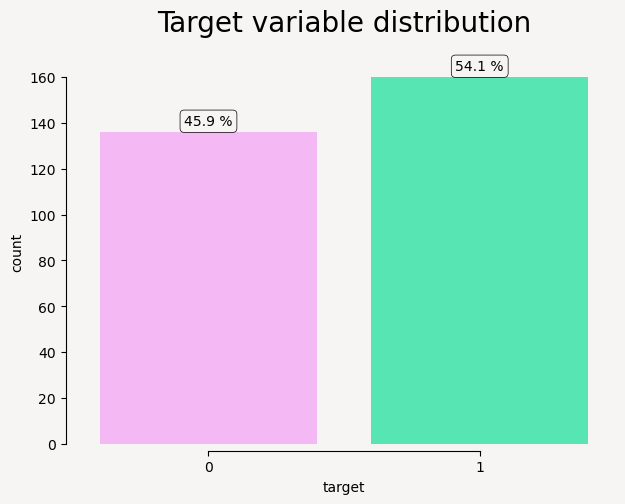

In [13]:
# Target distribution
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], hue=data['target'], palette=mypal[1::4], legend=False)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [14]:
# Numerical Features
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


- Age :
    - The average age in the dataset is 54.5 years
    - The oldest is 77 years, whereas the youngest is 29 years old
- Cholesterol:
    - The average registered cholestrol level is 247.15
    - Maximum level is 564 and the minimum level is 126.
##### Note: According to [6], a healthy cholesterol level is <200 mg/dl and usually high level of cholesterol is associated with heart disease.
- Resting blood pressure:
    - 131 mean, 200 max and 94 min
- Max heart rate achieved:
    - The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
- St_depression:
    - The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
- Number of major blood vessels:
    - A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

#### Distribution: Density plots

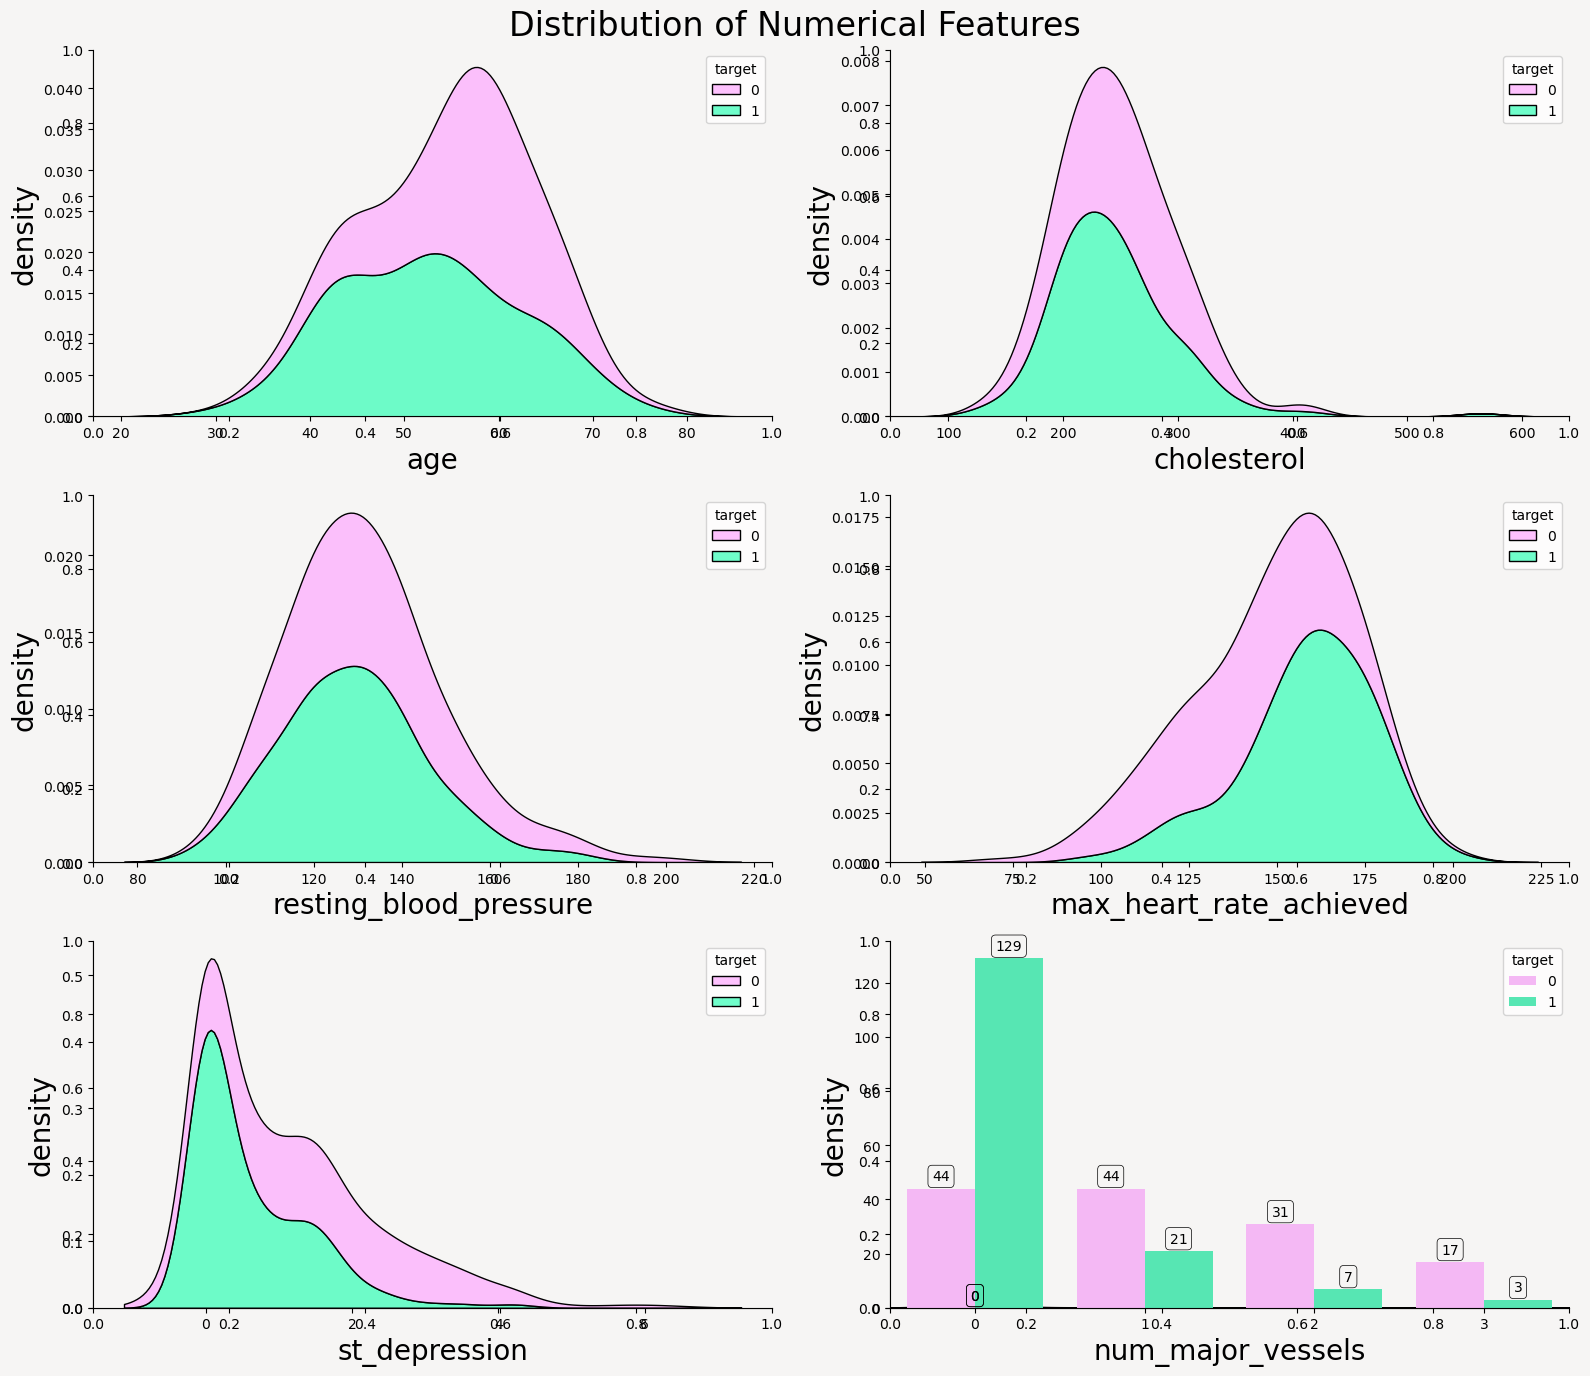

In [15]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)
plt.tight_layout()
plt.show()

In [16]:
# Define features and target
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
nom_feats = ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = bin_feats + nom_feats
target = 'target'
print(cat_feats)

# Convert categorical features to numerical using Label Encoding
for col in cat_feats:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']


In [17]:
# Splitting data into train & test sets
X = data[num_feats + cat_feats]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test[num_feats] = scaler.transform(X_test[num_feats])

In [18]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [19]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [20]:
# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

Confusion Matrix:
 [[22  6]
 [ 5 27]]

Random Forest:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.81      0.81      0.81        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Confusion Matrix:
 [[22  6]
 [ 6 26]]


- Logistic Regression has slightly better precision and recall, making it the preferred choice
- Random Forest is very close and may perform better with hyperparameter tuning.